# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [76]:
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [77]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [78]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [79]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:

* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Partir la BD en train y test

### Generación de información para el modelo

In [80]:
%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [81]:
y = df.Label
X = df.drop(['Label'], axis=1)

### Division del archivo en train y test para la preparacion del modelo

In [85]:
n_samples = y.shape[0]
print(n_samples)

138721


In [86]:
n_samples_0 = (y == 0).sum()
n_samples_0

137924

In [87]:
n_samples_1 = (y == 1).sum()
n_samples_1

797

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [83]:
X_train.shape

(69360, 15)

In [84]:
y_train.shape

(69360,)

In [88]:
n_samples_0 = (y_train == 0).sum()
n_samples_0

68975

In [89]:
n_samples_1 = (y_train == 1).sum()
n_samples_1

385

In [90]:
n_samples_1 / n_samples

0.0027753548489414005

#### Regresion Logistica

In [91]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

y= pd.Series(y_train).values
y.shape

(69360,)

In [92]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [60]:
prediccion = logreg.predict(X_train)
logreg.score(X_train,y_train)

0.98

In [61]:
print(accuracy_score(y_test, prediccion))

0.828


In [22]:
from sklearn.metrics import f1_score
y_pred = logreg.predict(X_test) 
print('f1 score(default): \n',  f1_score(y_test, y_pred))

f1 score(default): 
 0.8666666666666666


In [24]:
from sklearn.metrics import fbeta_score
fbeta_score(y_train, y_pred, average='macro', beta=10)

0.5046511899045372

#### Se puede apreciar que el cambio en el accuracy es radical entre la data de train y la test, posiblemente por el desbalanceo de los datos, lo que si llama la atención es lo bajo que da en comparación el fbeta score, quedando en un punto medio de 0.5

#### Decision tree

In [25]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=None, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [26]:
prediccion = treeclf.predict(X_train)
treeclf.score(X_train,y)

1.0

In [27]:
print(accuracy_score(y_test, prediccion))

0.82


In [28]:
y_pred = treeclf.predict(X_test) 
print('f1 score(default): \n',  f1_score(y_test, y_pred))

f1 score(default): 
 0.7764705882352942


In [29]:
fbeta_score(y_train, y_pred, average='macro', beta=10)

0.5208144688529728

#### La regresión logistica y el arbol de decisión tienen indicadores de precisión muy similares, y con una diferencia igual grande entre el accuracy normal y el Fbeta

# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [54]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Target percentage 0.2
x.shape= 282 y.shape =  282 y.mean() =  0.1879432624113475


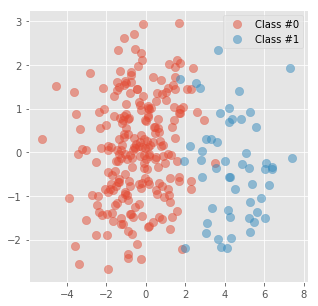

Target percentage 0.3
x.shape= 186 y.shape =  186 y.mean() =  0.2849462365591398


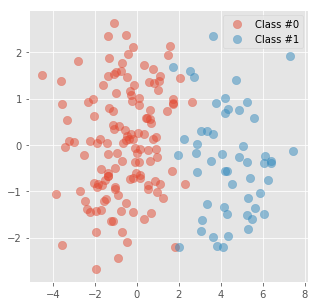

Target percentage 0.4
x.shape= 138 y.shape =  138 y.mean() =  0.38405797101449274


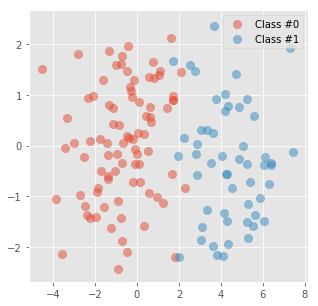

Target percentage 0.5
x.shape= 112 y.shape =  112 y.mean() =  0.4732142857142857


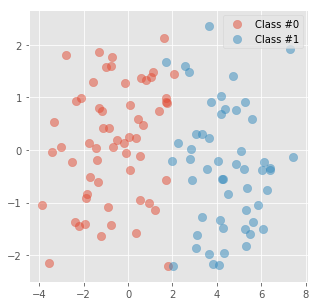

Regresion Logistica      p  Score  Accuracy  F1_score    F_beta
0  0.2  0.980     0.828  0.811321  0.497315
1  0.3  0.968     0.808  0.750000  0.489008
2  0.4  0.964     0.804  0.776699  0.500673
3  0.5  0.966     0.798  0.800000  0.498434
Arbol de decisión      p  Score  Accuracy  F1_score    F_beta
0  0.2  0.990     0.814  0.750000  0.489008
1  0.3  0.984     0.808  0.776699  0.500673
2  0.4  0.972     0.800  0.800000  0.498434
3  0.5  0.970     0.798  0.811321  0.497315


In [68]:
frl=[]
fad=[]
for target_percentage in [0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('x.shape=',X_u.shape[0],'y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show() 
    # Regresion Logistica
    logreg.fit(X_u, y_u)
    prediccion = logreg.predict(X_train)
    score=logreg.score(X_train,y_train)
    accura=(accuracy_score(y_test, prediccion))
    y_pred = treeclf.predict(X_test) 
    f1=f1_score(y_test, y_pred)
    fbeta=fbeta_score(y_train, y_pred, average='macro', beta=10)
    frl.append([target_percentage,score,accura,f1,fbeta])    
    # Arbol de decision
    treeclf.fit(X_u, y_u)
    prediccion = treeclf.predict(X_train)
    score=treeclf.score(X_train,y_train)
    accura=(accuracy_score(y_test, prediccion))
    y_pred = treeclf.predict(X_test) 
    f1=f1_score(y_test, y_pred)
    fbeta=fbeta_score(y_train, y_pred, average='macro', beta=10)
    fad.append([target_percentage,score,accura,f1,fbeta])    
    
frl=pd.DataFrame(frl, columns=['p','Score','Accuracy','F1_score','F_beta'])
fad=pd.DataFrame(fad, columns=['p','Score','Accuracy','F1_score','F_beta'])

print('Under Sampling')
print('Regresion Logistica')
print(frl)
print('Arbol de decisión')
print(fad)

#### Realmente no hay un cambio significativo en los indicadores de precision al trabajar varios niveles de under sampling, tanto para regresión logistica como para arboles de decisión

# Exercise 15.3

Same analysis using random-over-sampling

In [69]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

Target percentage 0.2
y.shape =  558 y.mean() =  0.1989247311827957


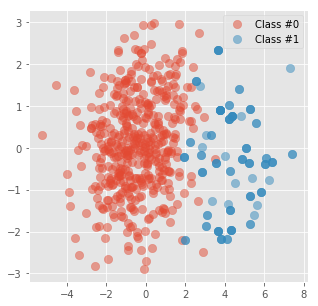

Target percentage 0.3
y.shape =  638 y.mean() =  0.2993730407523511


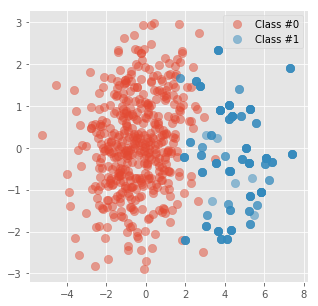

Target percentage 0.4
y.shape =  745 y.mean() =  0.4


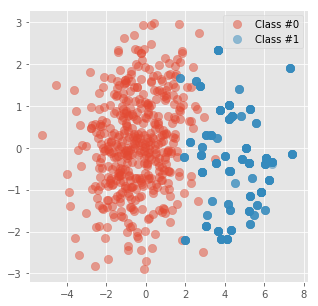

Target percentage 0.5
y.shape =  894 y.mean() =  0.5


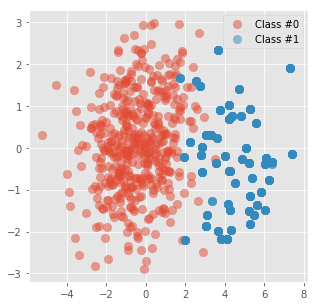

Over Sampling
Regresion Logistica
     p  Score  Accuracy  F1_score    F_beta
0  0.2  0.980     0.828  0.776471  0.520814
1  0.3  0.972     0.816  0.808989  0.516340
2  0.4  0.972     0.808  0.776471  0.520814
3  0.5  0.968     0.804  0.776471  0.520814
Arbol de decisión
     p  Score  Accuracy  F1_score    F_beta
0  0.2  0.998     0.822  0.808989  0.516340
1  0.3  1.000     0.820  0.776471  0.520814
2  0.4  1.000     0.820  0.776471  0.520814
3  0.5  1.000     0.820  0.776471  0.520814


In [71]:
frl=[]
fad=[]
for target_percentage in [0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()  
    # Regresion Logistica
    logreg.fit(X_u, y_u)
    prediccion = logreg.predict(X_train)
    score=logreg.score(X_train,y_train)
    accura=(accuracy_score(y_test, prediccion))
    y_pred = treeclf.predict(X_test) 
    f1=f1_score(y_test, y_pred)
    fbeta=fbeta_score(y_train, y_pred, average='macro', beta=10)
    frl.append([target_percentage,score,accura,f1,fbeta])    
    # Arbol de decision
    treeclf.fit(X_u, y_u)
    prediccion = treeclf.predict(X_train)
    score=treeclf.score(X_train,y_train)
    accura=(accuracy_score(y_test, prediccion))
    y_pred = treeclf.predict(X_test) 
    f1=f1_score(y_test, y_pred)
    fbeta=fbeta_score(y_train, y_pred, average='macro', beta=10)
    fad.append([target_percentage,score,accura,f1,fbeta])    
    
frl=pd.DataFrame(frl, columns=['p','Score','Accuracy','F1_score','F_beta'])
fad=pd.DataFrame(fad, columns=['p','Score','Accuracy','F1_score','F_beta'])

print('Over Sampling')
print('Regresion Logistica')
print(frl)
print('Arbol de decisión')
print(fad)

#### Aun con el over sampling no hay un gran cambio entre los modelos, es un poco mejor que el under samplig, pero solo un par de punto de acuerdo al Accuracy 

# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [72]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, x_vis.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  596 y.mean() =  0.25


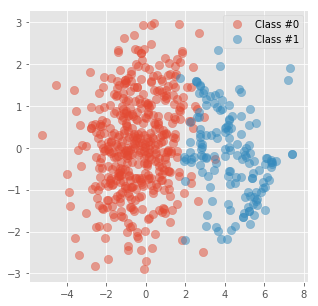

Target percentage 0.25 k  15
y.shape =  596 y.mean() =  0.25


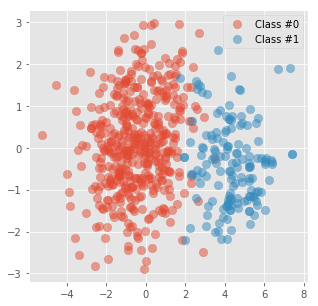

Target percentage 0.5 k  5
y.shape =  894 y.mean() =  0.5


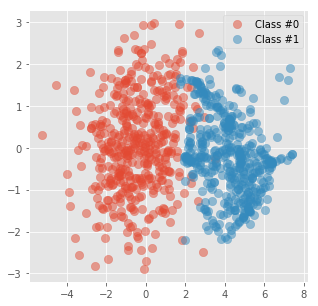

Target percentage 0.5 k  15
y.shape =  894 y.mean() =  0.5


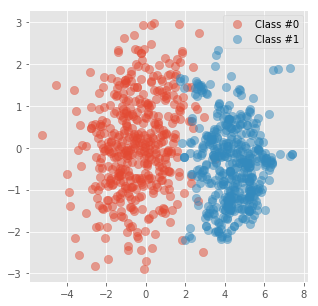

SMOTE
Regresion Logistica
      p  Neighbors  Score  Accuracy  F1_score    F_beta
0  0.25          5  0.972     0.816  0.776471  0.520814
1  0.25         15  0.978     0.826  0.808511  0.510746
2  0.50          5  0.964     0.800  0.847826  0.502417
3  0.50         15  0.970     0.806  0.800000  0.504031
Arbol de decisión
      p  Neighbors  Score  Accuracy  F1_score    F_beta
0  0.25          5    1.0      0.82  0.808511  0.510746
1  0.25         15    1.0      0.82  0.847826  0.502417
2  0.50          5    1.0      0.82  0.800000  0.504031
3  0.50         15    1.0      0.82  0.787879  0.494596


In [73]:
frl=[]
fad=[]
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
        plot_two_classes(X_u, y_u, size=(5, 5))
        plt.show()  
        # Regresion Logistica
        logreg.fit(X_u, y_u)
        prediccion = logreg.predict(X_train)
        score=logreg.score(X_train,y_train)
        accura=(accuracy_score(y_test, prediccion))
        y_pred = treeclf.predict(X_test) 
        f1=f1_score(y_test, y_pred)
        fbeta=fbeta_score(y_train, y_pred, average='macro', beta=10)
        frl.append([target_percentage,k,score,accura,f1,fbeta])    
        # Arbol de decision
        treeclf.fit(X_u, y_u)
        prediccion = treeclf.predict(X_train)
        score=treeclf.score(X_train,y_train)
        accura=(accuracy_score(y_test, prediccion))
        y_pred = treeclf.predict(X_test) 
        f1=f1_score(y_test, y_pred)
        fbeta=fbeta_score(y_train, y_pred, average='macro', beta=10)
        fad.append([target_percentage,k,score,accura,f1,fbeta])    
    
    
    
frl=pd.DataFrame(frl, columns=['p','Neighbors','Score','Accuracy','F1_score','F_beta'])
fad=pd.DataFrame(fad, columns=['p','Neighbors','Score','Accuracy','F1_score','F_beta'])

print('SMOTE')
print('Regresion Logistica')
print(frl)
print('Arbol de decisión')
print(fad)

#### Se da una ganancia mejor especialmente en el indicador F1 Score, el arbol de decision sigue siendo el mejor modelo

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [75]:
#import library and sample the train dataset
from collections import Counter
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, Y_train)
print('Resampled dataset shape %s' % Counter(y_train))

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
regTreeADASYN = DecisionTreeClassifier()
regTreeADASYN.fit(X_ada, y_ada)
Y_pred = regTreeADASYN.predict(X_validation)

eval_models.append(["DecisionTreeClassifier",
             len(Y_over_sample),
             target_percentage,
             accuracy_score(Y_validation, Y_pred), 
             f1_score(Y_validation, Y_pred), 
             fbeta_score(Y_validation, Y_pred, beta=10)])


In [ ]:
logregADASYN = LogisticRegression(solver='liblinear')

logregADASYN.fit(X_ada, y_ada)
Y_pred = logregADASYN.predict(X_validation)

eval_models.append(["DecisionTreeClassifier",
             len(Y_over_sample),
             target_percentage,
             accuracy_score(Y_validation, Y_pred), 
             f1_score(Y_validation, Y_pred), 
             fbeta_score(Y_validation, Y_pred, beta=10)])

# Exercise 15.6 (3 points)

Compare and comment about the results

tabla comparativa de resultados (Modelos vs resultados) solo usando test